# Pandas

Pandas is a Python library written for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Some of its features include:
- **DataFrame object for data manipulation.**
- Tools for reading and writing data between in-memory data structures and different file formats.
- Data alignment and integrated handling of missing data.
- Reshaping and pivoting of data sets.
- Label-based slicing, fancy indexing, and subsetting of large data sets.
- Time series-functionality: Date range generation, frequency conversions, moving window statistics, moving window linear regressions, date shifting and lagging.
- Optimized with core parts being written in C.
- Many more

Memorizing all functionalities of pandas is unfeasible and impractical. It's probably a good idea to have handy the [documentation](https://pandas.pydata.org/docs/reference/index.html#api).

**Data for the lecture can be found here: [data](https://uab-my.sharepoint.com/:u:/g/personal/1558645_uab_cat/EfgXCrsTxqxGlX-HS01ncKwBsS1kj1kI-LHSh33oi7jw2Q?e=sbzL9P)**

## The DataFrame object

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table. It is generally the most commonly used pandas object. DataFrames are used to organize and manipulate data. They also enable access to most of pandas' functionalities. Let's see some simple examples of how to create a DataFrame

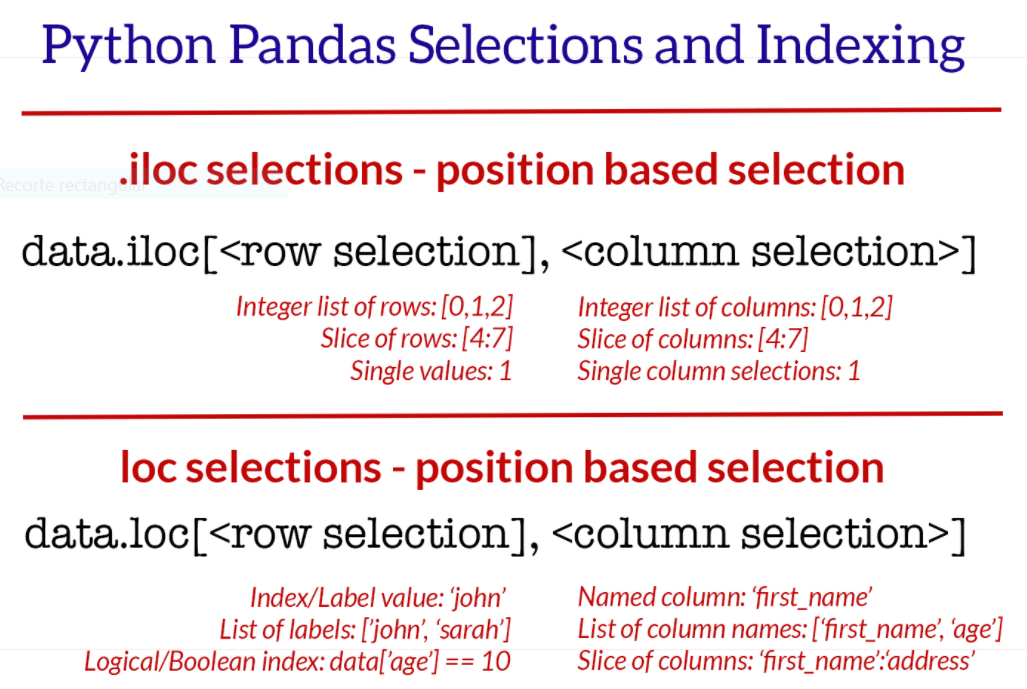<img src="indexing.png" alt="drawing" width="500"/>

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame({'A':[1,2,3],'B':[5,6,7]})
df.iloc[0]

A    1
B    5
Name: 0, dtype: int64

In [23]:
df = pd.read_csv('flights.dat', sep=";",date_parser=pd.to_datetime,parse_dates=['timestamp'])
with pd.option_context('display.max_colwidth', None):
    display(df)

,id,origin,dest,type,lat,lon,alt,timestamp
0,BHL731,ZZZZ,ZZZZ,S92,60.783333,3.433333,1000,2024-01-13 07:20:00
1,BHL731,ZZZZ,ZZZZ,S92,60.716667,3.566667,1000,2024-01-13 07:00:00
2,BHL741,ZZZZ,ZZZZ,S92,60.716667,3.566667,1000,2024-01-13 07:00:00
3,BHL358,ZZZZ,ENWV,S92,56.316667,3.350000,1000,2024-01-13 11:10:00
4,EWG6YJ,EDDL,LROP,A320,51.280833,6.757222,100,2024-01-13 09:51:00
...,...,...,...,...,...,...,...,...
1266394,ASL78E,LYBE,LBSF,AT72,42.598611,23.648611,7700,2024-01-13 13:16:18
1266395,ASL78E,LYBE,LBSF,AT72,42.681667,23.658056,5600,2024-01-13 13:17:31
1266396,ASL78E,LYBE,LBSF,AT72,42.683611,23.620556,5000,2024-01-13 13:17:53
1266397,ASL78E,LYBE,LBSF,AT72,42.691667,23.470833,2500,2024-01-13 13:19:37


### Tasks for today
- data cleaning
- filtering
- number of flights
- flight duration
- get all OD pairs
- for a given flight, extract the whole trajectory
- **Homework: Find closest distance between flights!**


In [24]:
sub_df = df.loc[(df['origin'] != 'ZZZZ') & (df['dest'] !='ZZZZ')]
sub_df

,id,origin,dest,type,lat,lon,alt,timestamp
4,EWG6YJ,EDDL,LROP,A320,51.280833,6.757222,100,2024-01-13 09:51:00
5,EWG6YJ,EDDL,LROP,A320,51.275833,6.745833,500,2024-01-13 09:51:10
6,EWG6YJ,EDDL,LROP,A320,51.270556,6.734722,1000,2024-01-13 09:51:23
7,EWG6YJ,EDDL,LROP,A320,51.229444,6.644722,5000,2024-01-13 09:52:52
8,EWG6YJ,EDDL,LROP,A320,51.224444,6.633333,5400,2024-01-13 09:52:59
...,...,...,...,...,...,...,...,...
1266394,ASL78E,LYBE,LBSF,AT72,42.598611,23.648611,7700,2024-01-13 13:16:18
1266395,ASL78E,LYBE,LBSF,AT72,42.681667,23.658056,5600,2024-01-13 13:17:31
1266396,ASL78E,LYBE,LBSF,AT72,42.683611,23.620556,5000,2024-01-13 13:17:53
1266397,ASL78E,LYBE,LBSF,AT72,42.691667,23.470833,2500,2024-01-13 13:19:37


In [27]:
time_df = sub_df.loc[(sub_df['timestamp'].dt.hour >=10) & (sub_df['timestamp'].dt.minute<=30)]
time_df

,id,origin,dest,type,lat,lon,alt,timestamp
14,EWG6YJ,EDDL,LROP,A320,51.061667,7.591389,23000,2024-01-13 10:00:06
15,EWG6YJ,EDDL,LROP,A320,51.004722,7.678333,24000,2024-01-13 10:00:45
16,EWG6YJ,EDDL,LROP,A320,50.991944,7.697778,24000,2024-01-13 10:00:54
17,EWG6YJ,EDDL,LROP,A320,50.966667,7.736389,24500,2024-01-13 10:01:13
18,EWG6YJ,EDDL,LROP,A320,50.935556,7.766667,25000,2024-01-13 10:01:32
...,...,...,...,...,...,...,...,...
1266394,ASL78E,LYBE,LBSF,AT72,42.598611,23.648611,7700,2024-01-13 13:16:18
1266395,ASL78E,LYBE,LBSF,AT72,42.681667,23.658056,5600,2024-01-13 13:17:31
1266396,ASL78E,LYBE,LBSF,AT72,42.683611,23.620556,5000,2024-01-13 13:17:53
1266397,ASL78E,LYBE,LBSF,AT72,42.691667,23.470833,2500,2024-01-13 13:19:37


In [31]:
flights = sub_df['id'].unique()
len(flights)

24143

In [33]:
cruising = sub_df.loc[sub_df['alt'] >= 25000]
cruising_flights = cruising['id'].unique()
len(cruising_flights)

20863

In [ ]:
for flight in cruising_flights:
    row = sub_df.loc[sub_df['id'] == flight]

In [37]:
groups = sub_df.groupby('id')
for name, group in groups:
    print(name)
    #print(group)
    lat = group['lat']
    lon = group['lon']
    alt = group['alt']
    print(lat)
    print(lon)
    print(alt)
    break

2BASG
525268    25.266667
525269    25.307222
525270    25.315278
525271    25.339722
525272    25.420833
            ...    
525361    51.218611
525362    51.153333
525363    51.133611
525364    51.216389
525365    51.234722
Name: lat, Length: 98, dtype: float64
525268    51.566667
525269    51.545278
525270    51.541111
525271    51.528056
525272    51.485278
            ...    
525361     6.863056
525362     6.763611
525363     6.733611
525364     6.746944
525365     6.749722
Name: lon, Length: 98, dtype: float64
525268       0
525269    2500
525270    3500
525271    5000
525272    9000
          ... 
525361    5000
525362    3500
525363    3000
525364    1500
525365    1000
Name: alt, Length: 98, dtype: int64


In [41]:
flights_df = sub_df[['id','origin','dest']]
flights_df = flights_df.drop_duplicates('id')
flights_df

,id,origin,dest
4,EWG6YJ,EDDL,LROP
60,RAM218,GMMN,KIAD
102,UAL909,KORD,EHAM
142,NAX8662,GCFV,ESSA
220,WZZ8RX,EPGD,EGGW
...,...,...,...
1266131,EZY8445,EGKK,EETN
1266188,EWG7EC,LOWW,EDDL
1266241,IBK2410,EGKK,GCTS
1266297,ENT7024,LTAI,EPWA


In [43]:
flights_df.iloc[0]

id        EWG6YJ
origin      EDDL
dest        LROP
Name: 4, dtype: object

In [48]:
flights_df.groupby(['origin','dest']).size().sort_values(ascending=False)

origin  dest
LTFJ    LTBJ    26
LTBJ    LTFJ    25
LTFJ    LTAC    25
ENGM    ENVA    25
LTBJ    LTBA    24
                ..
GMFF    GMAD     1
        EHEH     1
        EGSS     1
        EDLV     1
ZYTX    EDDF     1
Length: 11755, dtype: int64

In [53]:
sub_df.groupby('id')['timestamp'].agg([duration]).quantile([0.95])

,duration
0.95,10.191167


In [49]:
def duration(timestamps):
    return (timestamps.iloc[-1] - timestamps.iloc[0]).seconds / 3600.0